In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
PATH_TO_DATA = '/cellar/users/ramarty/Data/hla/git_data/'

Data requirements: PBR matrix, oncogene/tsgene files, (immune infiltration, tumor type, ancestory) <- maybe can be combined?

In [3]:
patient_affinities = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassII.csv', index_col=0).dropna()
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv', index_col=0).dropna()
all_mutations = list(patient_affinities.columns)

In [5]:
patient_affinities.head()

,EGFR_ifd_55174772,NOTCH1_ifd_136518618,PIK3R1_ifd_68295304,CTNNB1_ifd_41224643,PIK3R1_ifd_68293795,ERBB2_ifi_39724728,EGFR_ifd_55174773,PIK3R1_ifd_68293758,TP53_ifd_7675066,BRAF_ifd_140778037,...,THRAP3_R504W,KMT2C_W430C,KMT2B_R1597Q,PIK3R1_L573P,KMT2C_D4425Y,TCF12_R589H,TP53_A161D,KEAP1_V155F,NF1_P1990Q,TP53_I254S
TCGA-02-0003,52.265148,56.269861,10.124055,16.146696,53.128962,6.504687,31.568967,49.411595,65.855779,16.868111,...,90.551932,36.163855,30.522680,16.957071,8.546171,57.066392,25.802002,1.657148,13.551839,24.979903
TCGA-02-0033,41.109568,54.584064,8.700333,10.915331,50.766368,4.679077,34.554166,39.605204,49.100719,12.395997,...,81.357355,39.345444,34.158635,16.463908,10.728105,51.848827,24.626291,3.958570,12.091341,19.775829
TCGA-02-0047,40.581706,52.407053,1.335247,35.908051,46.318500,9.158061,25.831526,42.206977,60.318532,20.422887,...,88.890588,40.878284,29.899641,6.120444,7.743398,21.622955,32.352890,6.297456,7.202481,14.504534
TCGA-02-0055,37.016468,47.393696,9.443025,6.987636,53.821494,3.541421,34.511942,41.664306,53.320312,15.040540,...,76.286698,28.455277,35.864529,17.568790,9.126550,55.137451,27.369899,6.801003,11.527486,32.103563
TCGA-02-2466,43.621347,55.362139,1.331266,88.457888,47.980304,8.590443,33.891398,41.654599,64.150143,13.114090,...,92.017937,56.103928,27.747990,5.910957,6.363041,21.342708,38.857573,3.318297,7.029991,20.082977


In [6]:
from pandas import ExcelWriter
writer = ExcelWriter('/cellar/users/ramarty/Data/hla_ii/generated_data/tables/patient_affinities.xlsx')
patient_affinities.to_excel(writer,'PHBR-II Scores', index=True)
writer.save()

In [4]:
oncogenes = [x.strip() for x in open(PATH_TO_DATA + 'data/onco_genes.txt').readlines()]
tsgenes = [x.strip() for x in open(PATH_TO_DATA + 'data/tumor_suppressor_genes.txt').readlines()]
onco_muts = [x for x in all_mutations if x.split('_')[0] in oncogenes]
ts_muts = [x for x in all_mutations if x.split('_')[0] in tsgenes]
missense_muts = [x for x in all_mutations if len(x.split('_')) == 2]
indel_muts = [x for x in all_mutations if len(x.split('_')) == 3]

In [17]:
len(onco_muts), len(ts_muts)

(523, 495)

In [18]:
unpresented_mutations = list(patient_affinities.min()[patient_affinities.min() >= 10].index)

In [19]:
print len([x for x in unpresented_mutations if x in onco_muts])
print len([x for x in unpresented_mutations if x in ts_muts])

161
193


In [20]:
print len([x for x in onco_muts if x not in unpresented_mutations])
print len([x for x in ts_muts if x not in unpresented_mutations])

362
302


In [21]:
sp.fisher_exact([[len([x for x in unpresented_mutations if x in ts_muts]),
                  len([x for x in ts_muts if x not in unpresented_mutations])],
                 [len([x for x in unpresented_mutations if x in onco_muts]),
                  len([x for x in onco_muts if x not in unpresented_mutations])]])

(1.4369215581424046, 0.0069187172255322331)

In [22]:
patient_affinitiesI = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/patient_affinities.cancer.PHBR.csv', index_col=0).dropna()

In [23]:
unpresented_mutationsI = list(patient_affinitiesI.min()[patient_affinitiesI.min() >= 2].index)
print len(unpresented_mutationsI)

36


In [24]:
sp.fisher_exact([[len([x for x in unpresented_mutationsI if x in ts_muts]),
                  len([x for x in ts_muts if x not in unpresented_mutationsI])],
                 [len([x for x in unpresented_mutationsI if x in onco_muts]),
                  len([x for x in onco_muts if x not in unpresented_mutationsI])]])

(1.3342105263157895, 0.40290128277290782)

Restricting the patients for visibility purposes

In [5]:
clinical = pd.read_csv(PATH_TO_DATA + 'data/clinical/ancestory.csv', index_col=0)

In [6]:
clinical.head()

,race
TCGA-02-0001,WHITE
TCGA-02-0003,WHITE
TCGA-02-0004,WHITE
TCGA-02-0006,WHITE
TCGA-02-0007,WHITE


In [7]:
patient_affinities.shape

(5942, 1018)

In [28]:
clinical.ix[[x for x in clinical.index if x in list(patient_affinities.index)]].race.value_counts()

WHITE                                        4420
ASIAN                                         393
BLACK OR AFRICAN AMERICAN                     362
AMERICAN INDIAN OR ALASKA NATIVE                8
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER       1
Name: race, dtype: int64

In [29]:
# skip of patients are already known
'''
sampling_number = 350
asian = pd.Series([x for x in list(clinical[clinical.race.isin(['ASIAN'])].index) if x in list(patient_affinities.index)]).sample(sampling_number)
black = pd.Series([x for x in list(clinical[clinical.race.isin(['BLACK OR AFRICAN AMERICAN'])].index) if x in list(patient_affinities.index)]).sample(sampling_number)
white = pd.Series([x for x in list(clinical[clinical.race.isin(['WHITE'])].index) if x in list(patient_affinities.index)]).sample(sampling_number)
print len(asian), len(black), len(white)
restricted_patients = list(asian) + list(black) + list(white)
patient_affinities_small = patient_affinities.ix[restricted_patients, :]
patient_mutations_small = patient_mutations.ix[restricted_patients, :]
'''

350 350 350


In [10]:
restricted_patients = [x.strip() for x in open('/cellar/users/ramarty/Data/hla_ii/generated_data/overview/clustered_indices.without.indels.txt').readlines()]
patient_affinities_small = patient_affinities.ix[restricted_patients, :]
patient_mutations_small = patient_mutations.ix[restricted_patients, :]

Mutation variables

In [11]:
# added to remove indels
#all_mutations = [x for x in all_mutations if x not in indel_muts]

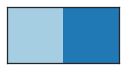

In [12]:
# add mutation type
mutation_df = pd.DataFrame({'Classification': ['Missense' for x in missense_muts if x in all_mutations] + ['Indel' for x in indel_muts if x in all_mutations],
                                 'Mutation': [x for x in missense_muts if x in all_mutations] + [x for x in indel_muts if x in all_mutations]})
cmap = sns.color_palette("Paired", 2)
def map_colors(x):
    if x == 'Missense':
        return cmap[0]
    elif x == 'Indel':
        return cmap[1]
mutation_df['Color'] = mutation_df['Classification'].apply(map_colors)
sns.palplot(sns.color_palette("Paired", 2))

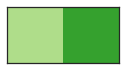

In [13]:
# add oncogene or tumor suppressor
gene_df = pd.DataFrame({'Classification': ['Onco' for x in onco_muts if x in all_mutations] + ['TS' for x in ts_muts if x in all_mutations],
                                 'Mutation': [x for x in onco_muts if x in all_mutations] + [x for x in ts_muts if x in all_mutations]})
cmap = sns.color_palette("Paired", 4)
def map_colors(x):
    if x == 'Onco':
        return cmap[2]
    elif x == 'TS':
        return cmap[3]
gene_df['Color'] = gene_df['Classification'].apply(map_colors)
sns.palplot(sns.color_palette("Paired", 4)[2:])

Patient variables

['LIHC', 'STAD', 'LUAD', 'KIRP', 'THCA', 'HNSC', 'COAD']


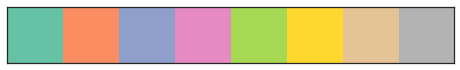

In [14]:
# add patient tissue - top 7 colors and then an 'other' color
patient_df = pd.read_csv(PATH_TO_DATA + 'data/patient_tissues.csv', index_col=0)
patient_df = patient_df.ix[restricted_patients]
large_tissues = list(patient_df.Tissue.value_counts().index[:7])
cmap = sns.color_palette("Set2", 10)
def map_colors(x):
    if x == large_tissues[0]:
        return cmap[0]
    elif x == large_tissues[1]:
        return cmap[1]
    elif x == large_tissues[2]:
        return cmap[2]
    elif x == large_tissues[3]:
        return cmap[3]
    elif x == large_tissues[4]:
        return cmap[4]
    elif x == large_tissues[5]:
        return cmap[5]
    elif x == large_tissues[6]:
        return cmap[6]
    else:
        # maybe change 'other' to white?
        return (1, 1, 1)
patient_df['Color'] = patient_df['Tissue'].apply(map_colors)
print large_tissues
sns.palplot(sns.color_palette("Set2", 8))

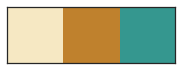

In [15]:
# add ethnicity to patient_df
clinical = pd.read_csv(PATH_TO_DATA + 'data/clinical/ancestory.csv', index_col=0)
patient_df = pd.merge(patient_df, clinical[['race']], left_index=True, right_index=True, how='left')
patient_df['race'] = list(patient_df['race'].fillna('OTHER'))
cmap = sns.color_palette("BrBG", 4)
def map_colors(x):
    if x == 'WHITE':
        return cmap[1]
    elif x == 'BLACK OR AFRICAN AMERICAN':
        return cmap[0]
    elif x == 'ASIAN':
        return cmap[3]
    else:
        return cmap[2]
patient_df['Ethnicity_Color'] = patient_df['race'].apply(map_colors)
sns.palplot([sns.color_palette("BrBG", 4)[1],sns.color_palette("BrBG", 4)[0],sns.color_palette("BrBG", 4)[3]])

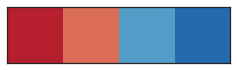

In [19]:
# add immune infiltration
hot_patients = [x.strip() for x in open('/cellar/users/ramarty/Data/hla_ii/generated_data/clinical/CD4_infiltration.hot.txt').readlines() if x.strip() in restricted_patients]
cold_patients = [x.strip() for x in open('/cellar/users/ramarty/Data/hla_ii/generated_data/clinical/CD4_infiltration.cold.txt').readlines() if x.strip() in restricted_patients]
warm_patients = [x.strip() for x in open('/cellar/users/ramarty/Data/hla_ii/generated_data/clinical/CD4_infiltration.warm.txt').readlines() if x.strip() in restricted_patients]
cool_patients = [x.strip() for x in open('/cellar/users/ramarty/Data/hla_ii/generated_data/clinical/CD4_infiltration.cool.txt').readlines() if x.strip() in restricted_patients]
immune_infil = []
for patient in list(patient_df.index):
    if patient in hot_patients:
        immune_infil.append('hot')
    elif patient in cold_patients:
        immune_infil.append('cold')
    elif patient in cool_patients:
        immune_infil.append('cool')
    elif patient in warm_patients:
        immune_infil.append('warm')
    else:
        immune_infil.append('neither')
patient_df['Immune_infil'] = immune_infil
cmap = sns.color_palette("RdBu", 8)
def map_colors(x):
    if x == 'hot':
        return cmap[0]
    elif x == 'warm':
        return cmap[1]
    elif x == 'neither':
        return (1,1,1)
    elif x == 'cool':
        return cmap[6]
    elif x == 'cold':
        return cmap[7]
patient_df['Immune_Color'] = patient_df['Immune_infil'].apply(map_colors)
sns.palplot(sns.color_palette("RdBu", 8)[:2] + sns.color_palette("RdBu", 8)[-2:])

Plot all together

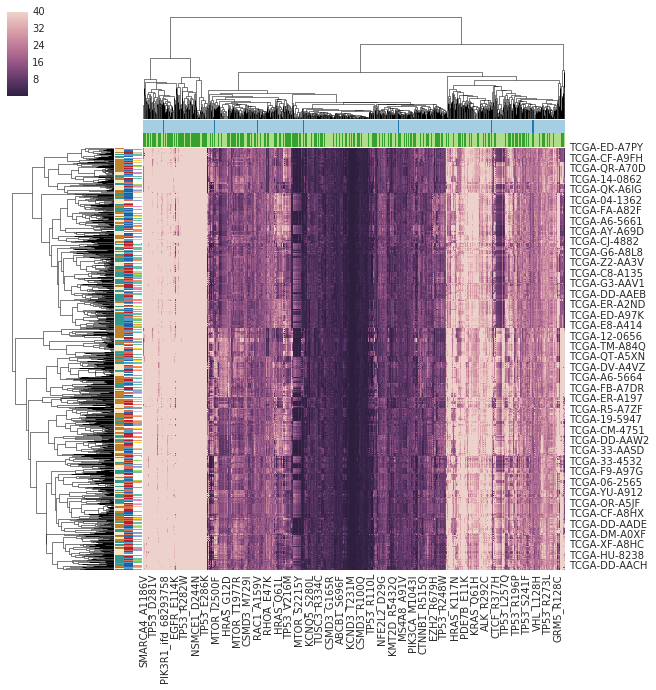

In [21]:
sns.clustermap(patient_affinities_small.ix[list(patient_df.index), list(mutation_df.Mutation)],#, xticklabels=False, yticklabels=False,
               row_colors=[list(patient_df.Ethnicity_Color), list(patient_df['Immune_Color']), list(patient_df.Color)], 
               col_colors=[list(mutation_df.Color), list(gene_df.Color)], vmax=40, cmap=sns.cubehelix_palette(reverse=True, as_cmap=True))
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/all/clustermap.PHBR.conservative.pdf')

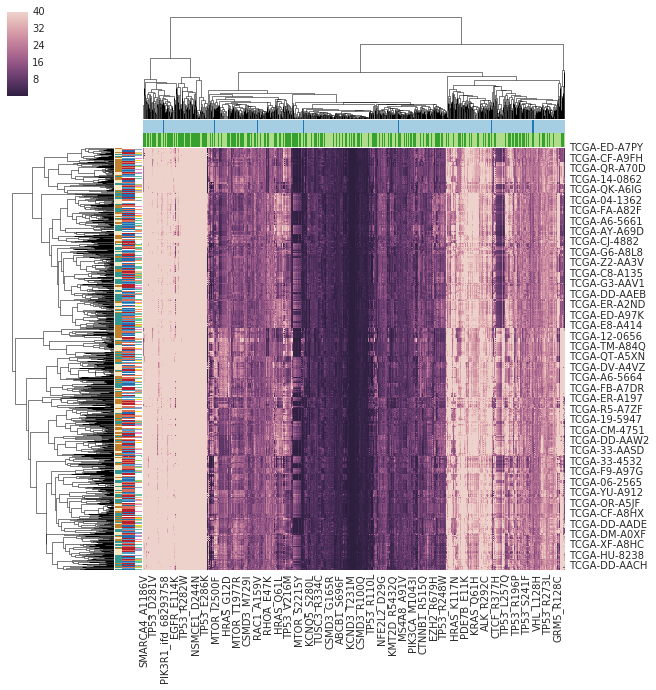

In [20]:
# remove the labels
cg = sns.clustermap(patient_affinities_small.ix[list(patient_df.index), list(mutation_df.Mutation)], # xticklabels=False, yticklabels=False,
               row_colors=[list(patient_df.Ethnicity_Color), list(patient_df['Immune_Color']), list(patient_df.Immune_Color), list(patient_df.Color)], 
               col_colors=[list(mutation_df.Color), list(gene_df.Color)], vmax=40, cmap=sns.cubehelix_palette(reverse=True, as_cmap=True))


In [39]:
with open('/cellar/users/ramarty/Data/hla_ii/generated_data/overview/clustered_columns.without.indels.txt', 'w') as f:
    for mutation in [list(mutation_df.Mutation)[i] for i in cg.dendrogram_col.reordered_ind]:
        f.write('{0}\n'.format(mutation))

In [40]:
with open('/cellar/users/ramarty/Data/hla_ii/generated_data/overview/clustered_indices.without.indels.txt', 'w') as f:
    for mutation in [list(list(patient_df.index))[i] for i in cg.dendrogram_row.reordered_ind]:
        f.write('{0}\n'.format(mutation))